In [4]:
### DEFINE VARIABLES
### DEFINE VARIABLES
### DEFINE VARIABLES
import os
import re
import shutil
import glob
import time

# Start time
start_time = time.time()

# Define directories
## Which GFF file to use for annotations?
input_gff_file = "SymbC1.Gene_Models_with_annotations.GFF3"

## Which VCF file to use for SNP visualisation?
my_vcf_file = "GATK_SYMBIONT_postBQSR_filtered_100Perc.noMAF_recodeAF_MAC2.recode.vcf"

#SNP_metadata = "SNP_metadata.csv"
SNP_metadata = "SNP_metadata_all_comparisons.csv"

# WHICH FILE TO USE TO BATCH PROCESS ALL SCAFFOLDS?
scaffolds_input_file = "scaffolds_list_selected.txt"
#scaffolds_input_file = "scaffold_list_SS8_VS_SS35.txt"
#scaffolds_input_file = "scaffold_list_WT_vs_SS.txt"

### CREATE OUTPUT DIRECTORY
output_dir = "./OUTPUT"
# Ensure the OUTPUT directory exists
if not os.path.exists(output_dir):
    os.makedirs(output_dir)
    
    
    
# Read the list of scaffolds from the file, excluding those with a prefix #
with open(scaffolds_input_file, 'r') as file:
    scaffolds = [line.strip() for line in file.readlines() if not line.startswith('#') and line.strip()]

    # Create a directory named after the scaffold
    for scaffold in scaffolds:
      # Create output directory for the scaffold within the OUTPUT directory
            scaffold_folder = os.path.join(output_dir, scaffold)
            if not os.path.exists(scaffold_folder):
                os.makedirs(scaffold_folder)
            print(f"Processing {scaffold}")
            print(f"Folder created: {scaffold_folder}")


Processing SymbC1.scaffold3829
Folder created: ./OUTPUT/SymbC1.scaffold3829
Processing SymbC1.scaffold6722
Folder created: ./OUTPUT/SymbC1.scaffold6722
Processing SymbC1.scaffold14903
Folder created: ./OUTPUT/SymbC1.scaffold14903
Processing SymbC1.scaffold1282
Folder created: ./OUTPUT/SymbC1.scaffold1282
Processing SymbC1.scaffold3428
Folder created: ./OUTPUT/SymbC1.scaffold3428
Processing SymbC1.scaffold13115
Folder created: ./OUTPUT/SymbC1.scaffold13115
Processing SymbC1.scaffold2613
Folder created: ./OUTPUT/SymbC1.scaffold2613
Processing SymbC1.scaffold1154
Folder created: ./OUTPUT/SymbC1.scaffold1154
Processing SymbC1.scaffold9320
Folder created: ./OUTPUT/SymbC1.scaffold9320
Processing SymbC1.scaffold2697
Folder created: ./OUTPUT/SymbC1.scaffold2697
Processing SymbC1.scaffold4973
Folder created: ./OUTPUT/SymbC1.scaffold4973
Processing SymbC1.scaffold4254
Folder created: ./OUTPUT/SymbC1.scaffold4254


In [5]:
### SUBSET GFF FILE TO SHOW SCAFFOLD OF INTEREST
### SUBSET GFF FILE TO SHOW SCAFFOLD OF INTEREST
### SUBSET GFF FILE TO SHOW SCAFFOLD OF INTEREST
import os
import re

# Ensure the OUTPUT directory exists
output_dir = "./OUTPUT"
if not os.path.exists(output_dir):
    os.makedirs(output_dir)
        
for scaffold in scaffolds:
    # Create output directory for the scaffold within the OUTPUT directory
    scaffold_folder = os.path.join(output_dir, scaffold)
    if not os.path.exists(scaffold_folder):
        os.makedirs(scaffold_folder)
    print(f"Processing {scaffold}")
    print(f"Folder created: {scaffold_folder}")
    
    # Define the input and output file names
    gff_subset_no_SNPs = os.path.join(scaffold_folder, f"{scaffold}_SymbC1.Gene_Models_scaffold_subset.GFF3")
    
    # Process the GFF file line by line
    with open(input_gff_file, "r") as f_in, open(gff_subset_no_SNPs, "w") as f_out:
        for line in f_in:
            if re.search(fr"\b{scaffold}\b", line):
                f_out.write(line)



Processing SymbC1.scaffold3829
Folder created: ./OUTPUT/SymbC1.scaffold3829
Processing SymbC1.scaffold6722
Folder created: ./OUTPUT/SymbC1.scaffold6722
Processing SymbC1.scaffold14903
Folder created: ./OUTPUT/SymbC1.scaffold14903
Processing SymbC1.scaffold1282
Folder created: ./OUTPUT/SymbC1.scaffold1282
Processing SymbC1.scaffold3428
Folder created: ./OUTPUT/SymbC1.scaffold3428
Processing SymbC1.scaffold13115
Folder created: ./OUTPUT/SymbC1.scaffold13115
Processing SymbC1.scaffold2613
Folder created: ./OUTPUT/SymbC1.scaffold2613
Processing SymbC1.scaffold1154
Folder created: ./OUTPUT/SymbC1.scaffold1154
Processing SymbC1.scaffold9320
Folder created: ./OUTPUT/SymbC1.scaffold9320
Processing SymbC1.scaffold2697
Folder created: ./OUTPUT/SymbC1.scaffold2697
Processing SymbC1.scaffold4973
Folder created: ./OUTPUT/SymbC1.scaffold4973
Processing SymbC1.scaffold4254
Folder created: ./OUTPUT/SymbC1.scaffold4254


In [6]:
### SUBSET VCF FILE TO SHOW SCAFFOLD OF INTEREST 
### SUBSET VCF FILE TO SHOW SCAFFOLD OF INTEREST 
### SUBSET VCF FILE TO SHOW SCAFFOLD OF INTEREST
import os
import re

# Ensure the OUTPUT directory exists
output_dir = "./OUTPUT"
if not os.path.exists(output_dir):
    os.makedirs(output_dir)

for scaffold in scaffolds:
    # Create output directory for the scaffold within the OUTPUT directory
    scaffold_folder = os.path.join(output_dir, scaffold)
    if not os.path.exists(scaffold_folder):
        os.makedirs(scaffold_folder)
    print(f"Processing {scaffold}")
    print(f"Folder created: {scaffold_folder}")
    
    # Define the output VCF file name
    vcf_file_subset = os.path.join(scaffold_folder, f"{scaffold}_VCF_SUBSET_{my_vcf_file}")

    # Open the input VCF file for reading and the output VCF file for writing
    with open(my_vcf_file, 'r') as vcf_file, open(vcf_file_subset, 'w') as out_file:
        for line in vcf_file:
            if line.startswith('#') or re.search(fr"\b{scaffold}\b", line):
                out_file.write(line)

    print(f"Filtered VCF file created: {vcf_file_subset}")

    
### REFORMAT VCF SUBSET TO GFF FORMAT
### REFORMAT VCF SUBSET TO GFF FORMAT
### REFORMAT VCF SUBSET TO GFF FORMAT

# Continue within the same loop to process the VCF subset
    gff_subset_SNPs_only = os.path.join(scaffold_folder, f"{scaffold}_SNPs_{my_vcf_file}.GFF")

    # Open the VCF subset file for reading and the GFF file for writing
    with open(vcf_file_subset, 'r') as vcf_file, open(gff_subset_SNPs_only, 'w') as converted_file:
        for line in vcf_file:
            if line.startswith('#'):
                continue
            
            # Split the line into fields
            fields = line.strip().split('\t')
            
            # Extract scaffold information from the first field
            scaffold = fields[0]
            
            # Extract other relevant information
            position = fields[1]
            reference_allele = fields[3]
            alternate_allele = fields[4]
            
            # Format the extracted information into the desired format
            converted_line = f"{scaffold}\tEVM\tSNP\t{position}\t{position}\t.\t+\t.\tgene_id={scaffold};Name={scaffold}\n"
            
            # Write the converted line to the new file
            converted_file.write(converted_line)
            
    print(f"Converted GFF file created: {gff_subset_SNPs_only}")

            

Processing SymbC1.scaffold3829
Folder created: ./OUTPUT/SymbC1.scaffold3829
Filtered VCF file created: ./OUTPUT/SymbC1.scaffold3829/SymbC1.scaffold3829_VCF_SUBSET_GATK_SYMBIONT_postBQSR_filtered_100Perc.noMAF_recodeAF_MAC2.recode.vcf
Converted GFF file created: ./OUTPUT/SymbC1.scaffold3829/SymbC1.scaffold3829_SNPs_GATK_SYMBIONT_postBQSR_filtered_100Perc.noMAF_recodeAF_MAC2.recode.vcf.GFF
Processing SymbC1.scaffold6722
Folder created: ./OUTPUT/SymbC1.scaffold6722
Filtered VCF file created: ./OUTPUT/SymbC1.scaffold6722/SymbC1.scaffold6722_VCF_SUBSET_GATK_SYMBIONT_postBQSR_filtered_100Perc.noMAF_recodeAF_MAC2.recode.vcf
Converted GFF file created: ./OUTPUT/SymbC1.scaffold6722/SymbC1.scaffold6722_SNPs_GATK_SYMBIONT_postBQSR_filtered_100Perc.noMAF_recodeAF_MAC2.recode.vcf.GFF
Processing SymbC1.scaffold14903
Folder created: ./OUTPUT/SymbC1.scaffold14903
Filtered VCF file created: ./OUTPUT/SymbC1.scaffold14903/SymbC1.scaffold14903_VCF_SUBSET_GATK_SYMBIONT_postBQSR_filtered_100Perc.noMAF_recod

In [7]:
### SUBSET METADATA
### SUBSET METADATA
### SUBSET METADATA

import os
import subprocess
   

for scaffold in scaffolds:
    # Update scaffold_folder for each scaffold
    scaffold_folder = os.path.join(output_dir, scaffold)

    #Define the output VCF file name
    meta_data_subset = os.path.join(scaffold_folder, f"{scaffold}_SNP_metadata.csv")
    # Redefine variables for the loop
    gff_subset_SNPs_only = os.path.join(scaffold_folder, f"{scaffold}_SNPs_{my_vcf_file}.GFF")
    vcf_file_subset = os.path.join(scaffold_folder, f"{scaffold}_VCF_SUBSET_{my_vcf_file}")
    gff_subset_no_SNPs = os.path.join(scaffold_folder, f"{scaffold}_SymbC1.Gene_Models_scaffold_subset.GFF3")

    # Open the input VCF file for reading
    with open(SNP_metadata, 'r') as vcf_file:
        # Open the new output VCF file for writing
        with open(meta_data_subset, 'w') as out_file:
            # Iterate through each line in the VCF file
            for line in vcf_file:
                # Check if the line contains the scaffold identifier
                if re.search(fr".*{scaffold}\s.*", line):
                    # Write the line to the output file
                    out_file.write(line)
    
    print(f"Filtered VCF file created: {meta_data_subset}")
    
    
    
    ### ADD META DATA TO GFF FILE THAT HAS ONLY THE RELEVANT SNP INFORMATION
    ### ADD META DATA TO GFF FILE THAT HAS ONLY THE RELEVANT SNP INFORMATION
    ### ADD META DATA TO GFF FILE THAT HAS ONLY THE RELEVANT SNP INFORMATION
    
    gff_subset_SNPs_only_including_metadata = os.path.join(scaffold_folder, f"{scaffold}_SNP_metadata.GFF")
    
    # Read metadata from CSV
    metadata_lines = []
    with open(meta_data_subset, 'r') as meta_file:
        for line in meta_file:
            metadata_lines.append(line.strip())
    
    # Read GFF file and add metadata
    with open(gff_subset_SNPs_only, 'r') as gff_file:
        with open(gff_subset_SNPs_only_including_metadata, 'w') as output_file:
            for gff_line, metadata_line in zip(gff_file, metadata_lines):
                gff_fields = gff_line.strip().split('\t')
                metadata_fields = metadata_line.strip().split('\t')
                Scaffold_Length, impact, category, annotation, GLM_padjust_WT_vs_SS, star_WT_vs_SS, GLM_padjust_SS8_vs_SS35, star_SS8_vs_SS35 = metadata_fields[4], metadata_fields[8], metadata_fields[9], metadata_fields[11], metadata_fields[19], metadata_fields[20], metadata_fields[39], metadata_fields[40] 
                gff_fields[8] += f";Scaffold_Length={Scaffold_Length};impact={impact};category={category};annotation={annotation};padjust_WT_vs_SS={GLM_padjust_WT_vs_SS};star_WT_vs_SS={star_WT_vs_SS};padjust_SS8_vs_SS35={GLM_padjust_SS8_vs_SS35};star_SS8_vs_SS35={star_SS8_vs_SS35}"
                output_file.write('\t'.join(gff_fields) + '\n')

    print(f"Merged GFF file created: {gff_subset_SNPs_only_including_metadata}")

Filtered VCF file created: ./OUTPUT/SymbC1.scaffold3829/SymbC1.scaffold3829_SNP_metadata.csv
Merged GFF file created: ./OUTPUT/SymbC1.scaffold3829/SymbC1.scaffold3829_SNP_metadata.GFF
Filtered VCF file created: ./OUTPUT/SymbC1.scaffold6722/SymbC1.scaffold6722_SNP_metadata.csv
Merged GFF file created: ./OUTPUT/SymbC1.scaffold6722/SymbC1.scaffold6722_SNP_metadata.GFF
Filtered VCF file created: ./OUTPUT/SymbC1.scaffold14903/SymbC1.scaffold14903_SNP_metadata.csv
Merged GFF file created: ./OUTPUT/SymbC1.scaffold14903/SymbC1.scaffold14903_SNP_metadata.GFF
Filtered VCF file created: ./OUTPUT/SymbC1.scaffold1282/SymbC1.scaffold1282_SNP_metadata.csv
Merged GFF file created: ./OUTPUT/SymbC1.scaffold1282/SymbC1.scaffold1282_SNP_metadata.GFF
Filtered VCF file created: ./OUTPUT/SymbC1.scaffold3428/SymbC1.scaffold3428_SNP_metadata.csv
Merged GFF file created: ./OUTPUT/SymbC1.scaffold3428/SymbC1.scaffold3428_SNP_metadata.GFF
Filtered VCF file created: ./OUTPUT/SymbC1.scaffold13115/SymbC1.scaffold1311

In [8]:
# COMBINE GFF SUBSET WITH GFF THAT SHOWS RELEVANT SNPs
# COMBINE GFF SUBSET WITH GFF THAT SHOWS RELEVANT SNPs
# COMBINE GFF SUBSET WITH GFF THAT SHOWS RELEVANT SNPs
for scaffold in scaffolds:
    # Update scaffold_folder for each scaffold
    scaffold_folder = os.path.join(output_dir, scaffold)

    gff_subset_concatenated_with_SNPs = os.path.join(scaffold_folder, f"{scaffold}_concatenated_output.gff")  
    #Define the output VCF file name
    # Redefine variables for the loop
    meta_data_subset = os.path.join(scaffold_folder, f"{scaffold}_SNP_metadata.csv")
    gff_subset_SNPs_only = os.path.join(scaffold_folder, f"{scaffold}_SNPs_{my_vcf_file}.GFF")
    vcf_file_subset = os.path.join(scaffold_folder, f"{scaffold}_VCF_SUBSET_{my_vcf_file}")
    gff_subset_no_SNPs = os.path.join(scaffold_folder, f"{scaffold}_SymbC1.Gene_Models_scaffold_subset.GFF3")
    gff_subset_SNPs_only_including_metadata = os.path.join(scaffold_folder, f"{scaffold}_SNP_metadata.GFF")
    
    # Concatenate the VCF subset and GFF files into the final output file
    with open((gff_subset_concatenated_with_SNPs), 'w') as final_out_file:
        # First, write the contents of the VCF subset file
        with open((gff_subset_no_SNPs), 'r') as vcf_subset_file:
            for line in vcf_subset_file:
                final_out_file.write(line)
        
        # Then, write the contents of the GFF file
        with open((gff_subset_SNPs_only_including_metadata), 'r') as gff_file:
            for line in gff_file:
                final_out_file.write(line)
    
    
    print(f"Final concatenated file created: {gff_subset_concatenated_with_SNPs}")        

Final concatenated file created: ./OUTPUT/SymbC1.scaffold3829/SymbC1.scaffold3829_concatenated_output.gff
Final concatenated file created: ./OUTPUT/SymbC1.scaffold6722/SymbC1.scaffold6722_concatenated_output.gff
Final concatenated file created: ./OUTPUT/SymbC1.scaffold14903/SymbC1.scaffold14903_concatenated_output.gff
Final concatenated file created: ./OUTPUT/SymbC1.scaffold1282/SymbC1.scaffold1282_concatenated_output.gff
Final concatenated file created: ./OUTPUT/SymbC1.scaffold3428/SymbC1.scaffold3428_concatenated_output.gff
Final concatenated file created: ./OUTPUT/SymbC1.scaffold13115/SymbC1.scaffold13115_concatenated_output.gff
Final concatenated file created: ./OUTPUT/SymbC1.scaffold2613/SymbC1.scaffold2613_concatenated_output.gff
Final concatenated file created: ./OUTPUT/SymbC1.scaffold1154/SymbC1.scaffold1154_concatenated_output.gff
Final concatenated file created: ./OUTPUT/SymbC1.scaffold9320/SymbC1.scaffold9320_concatenated_output.gff
Final concatenated file created: ./OUTPUT/

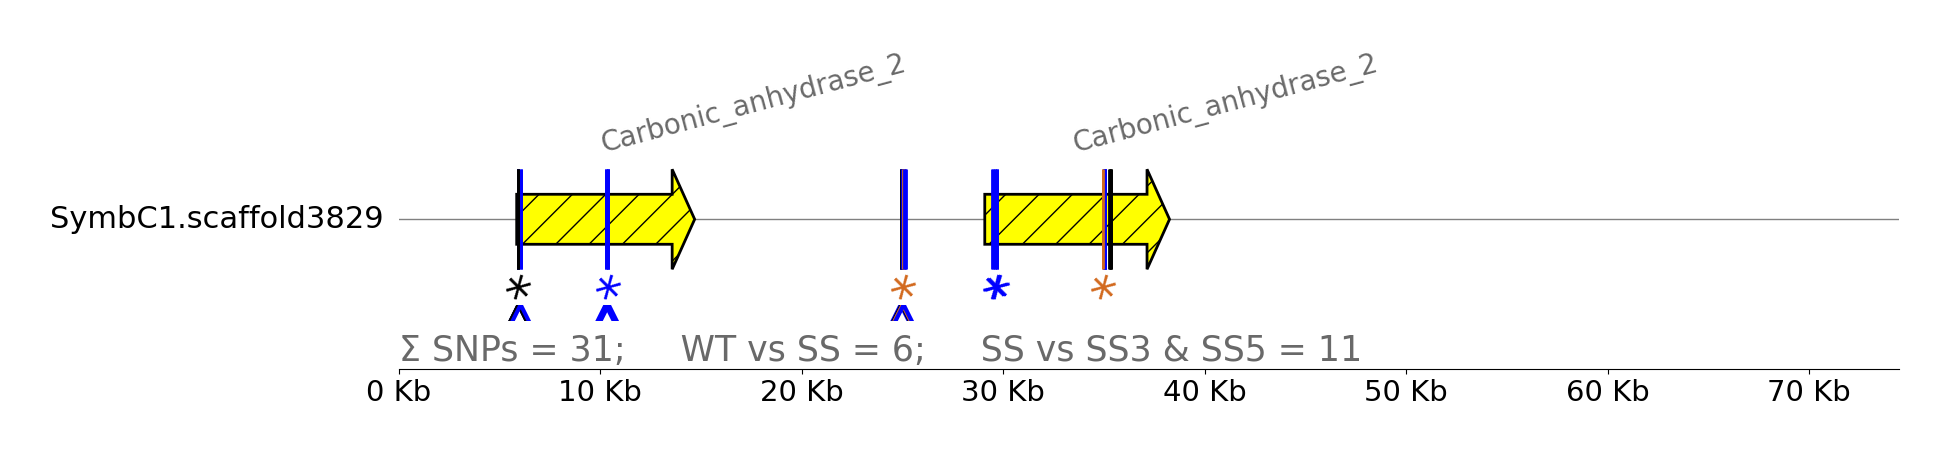

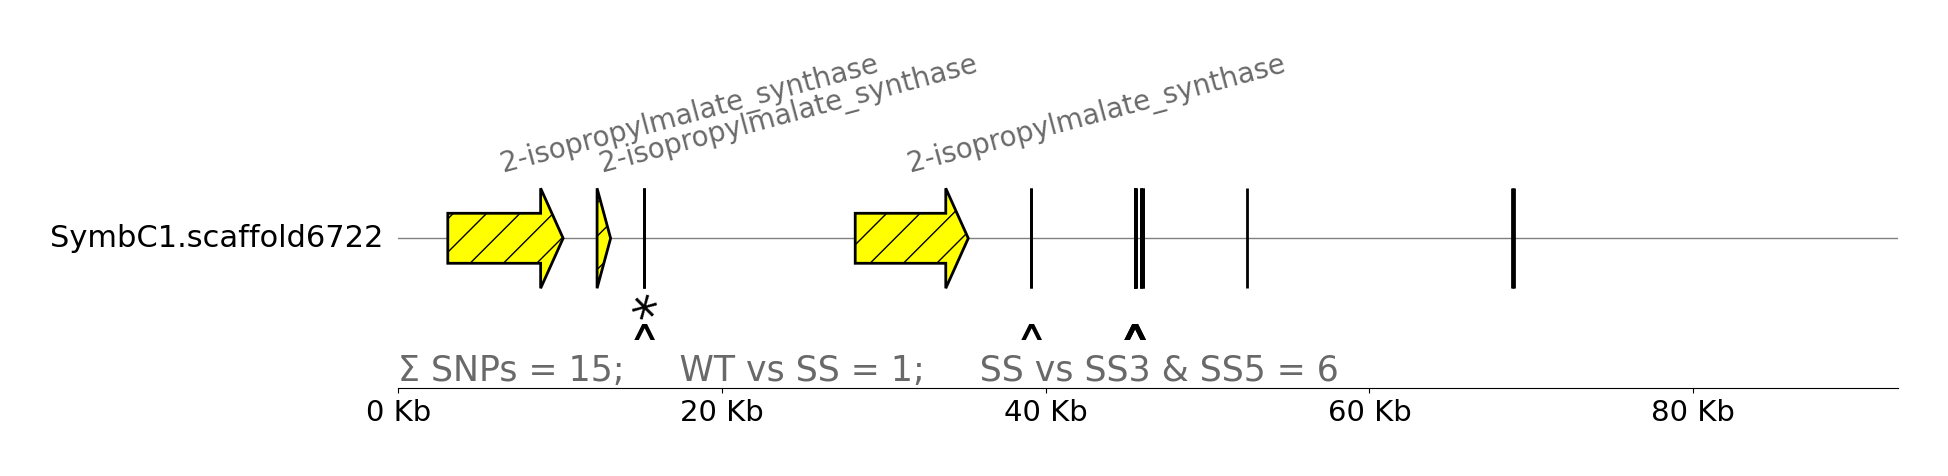

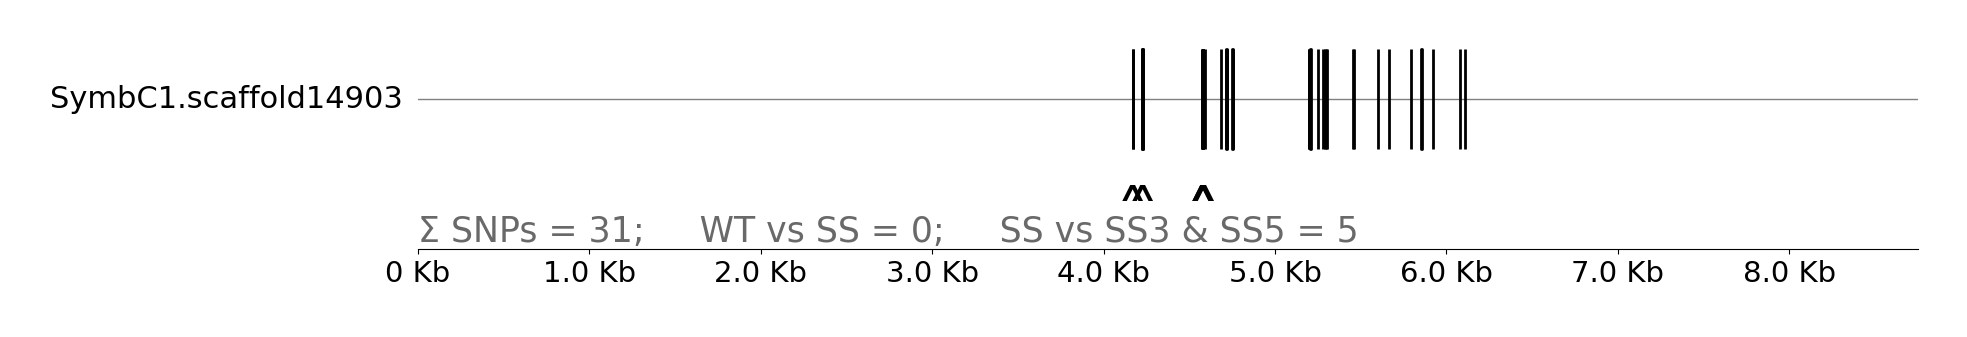

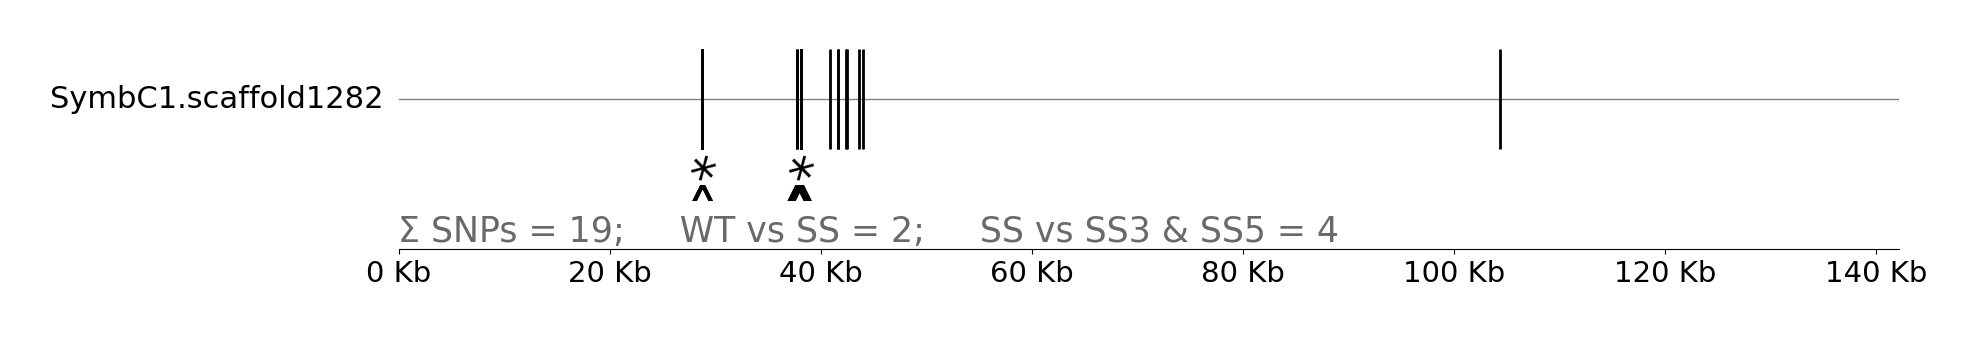

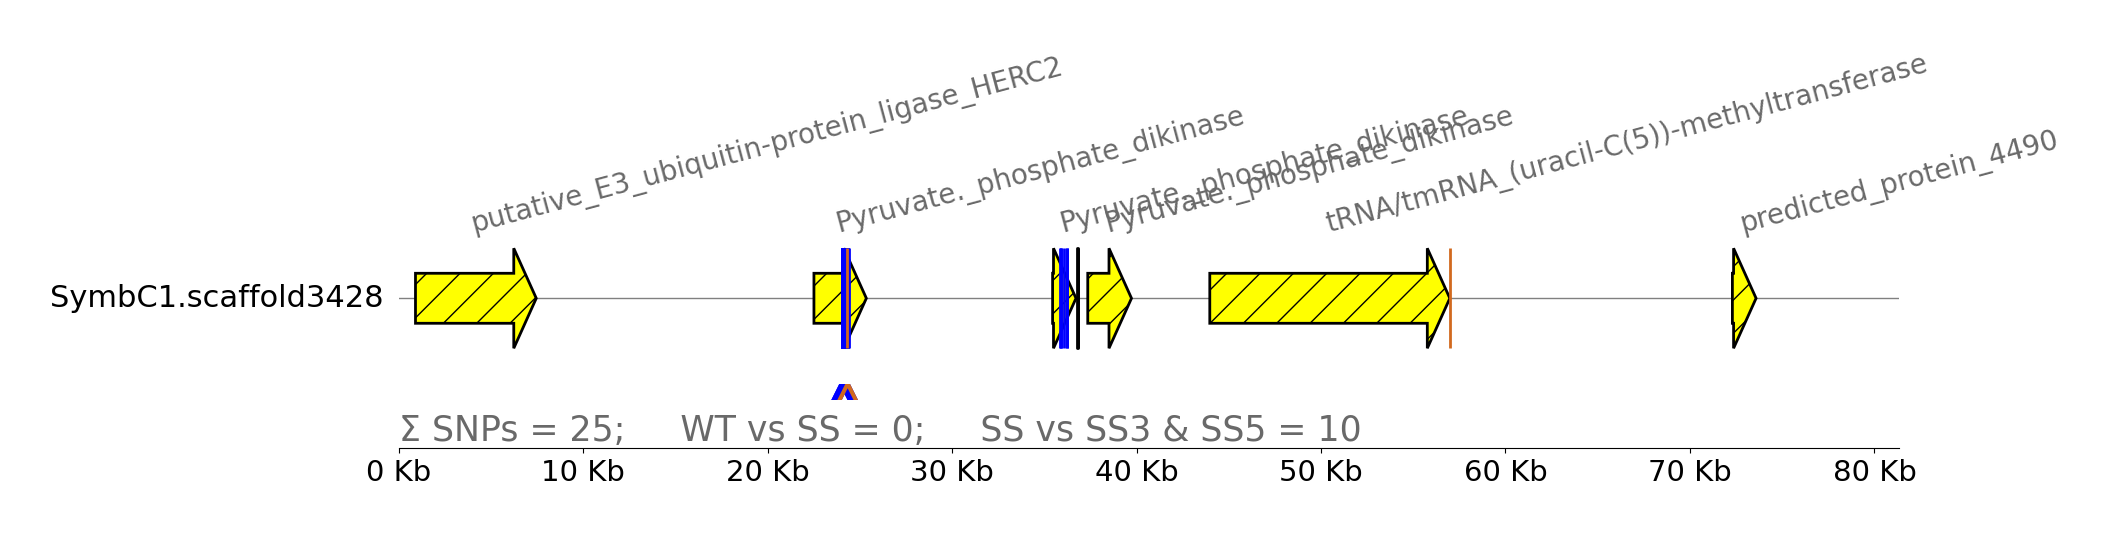

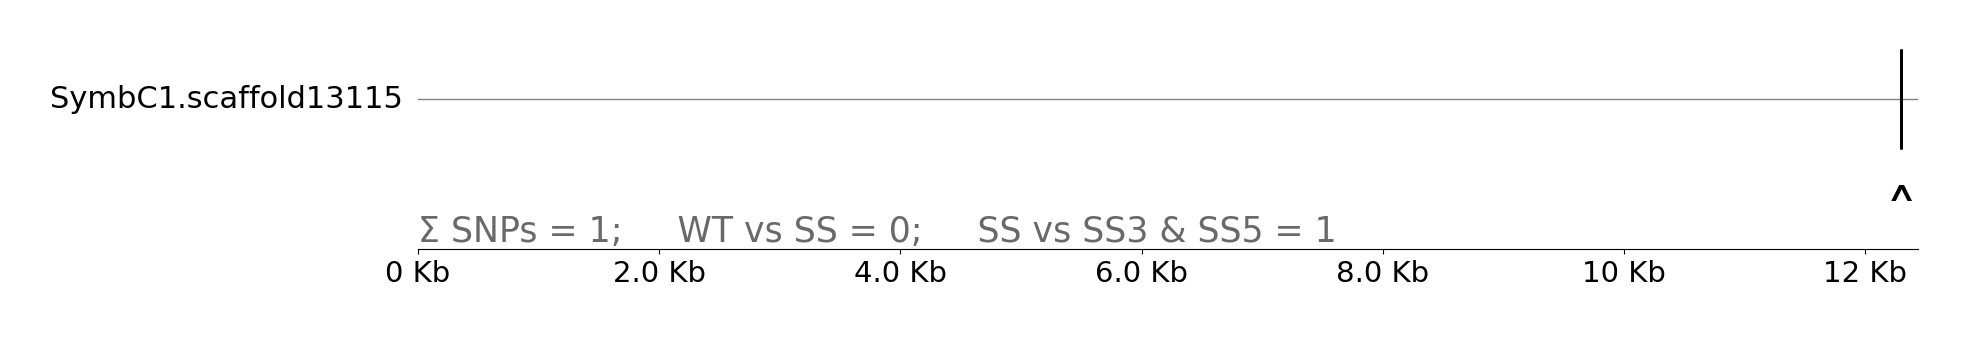

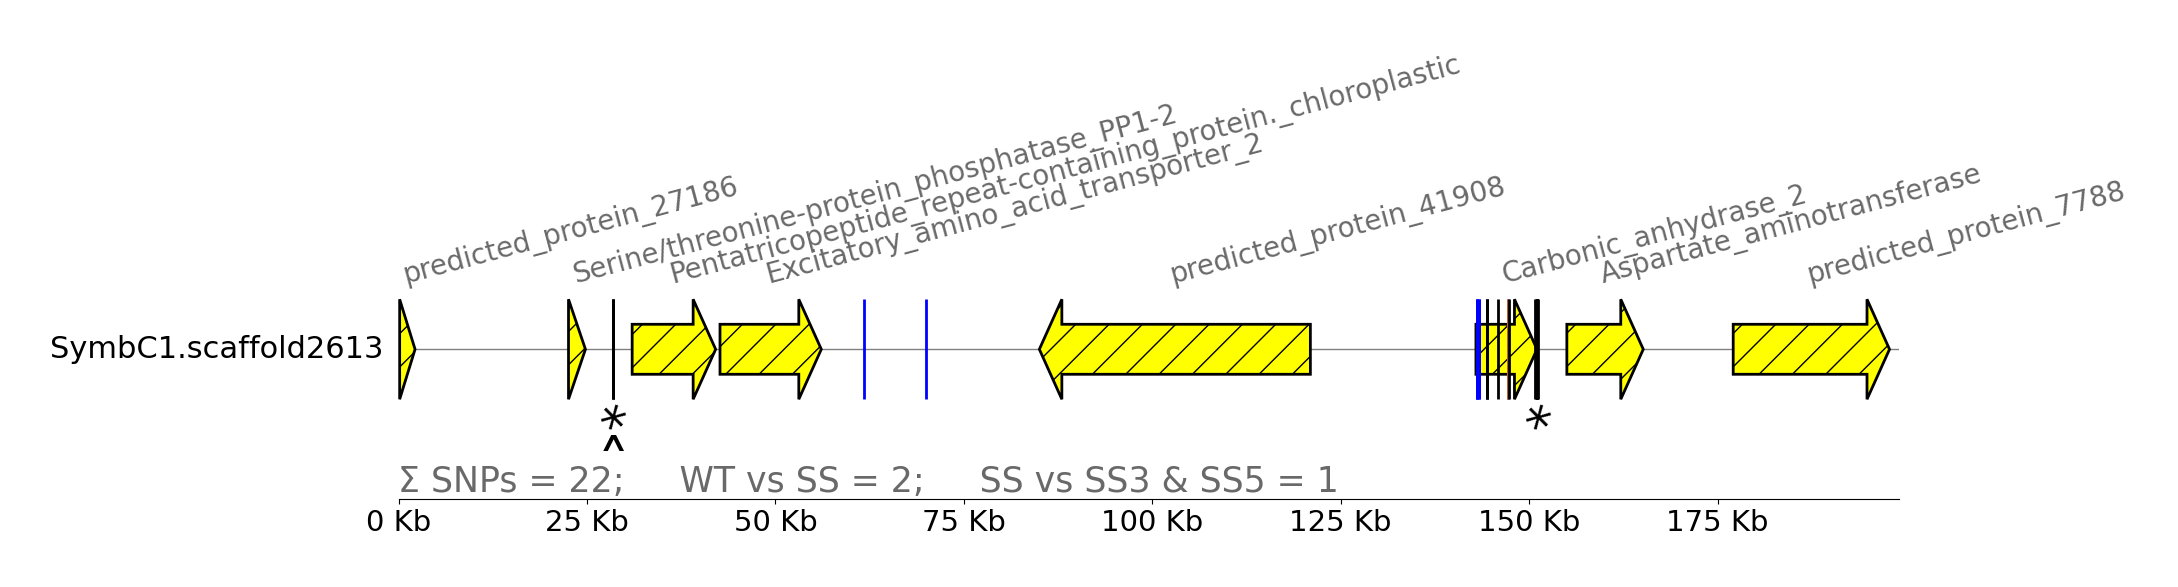

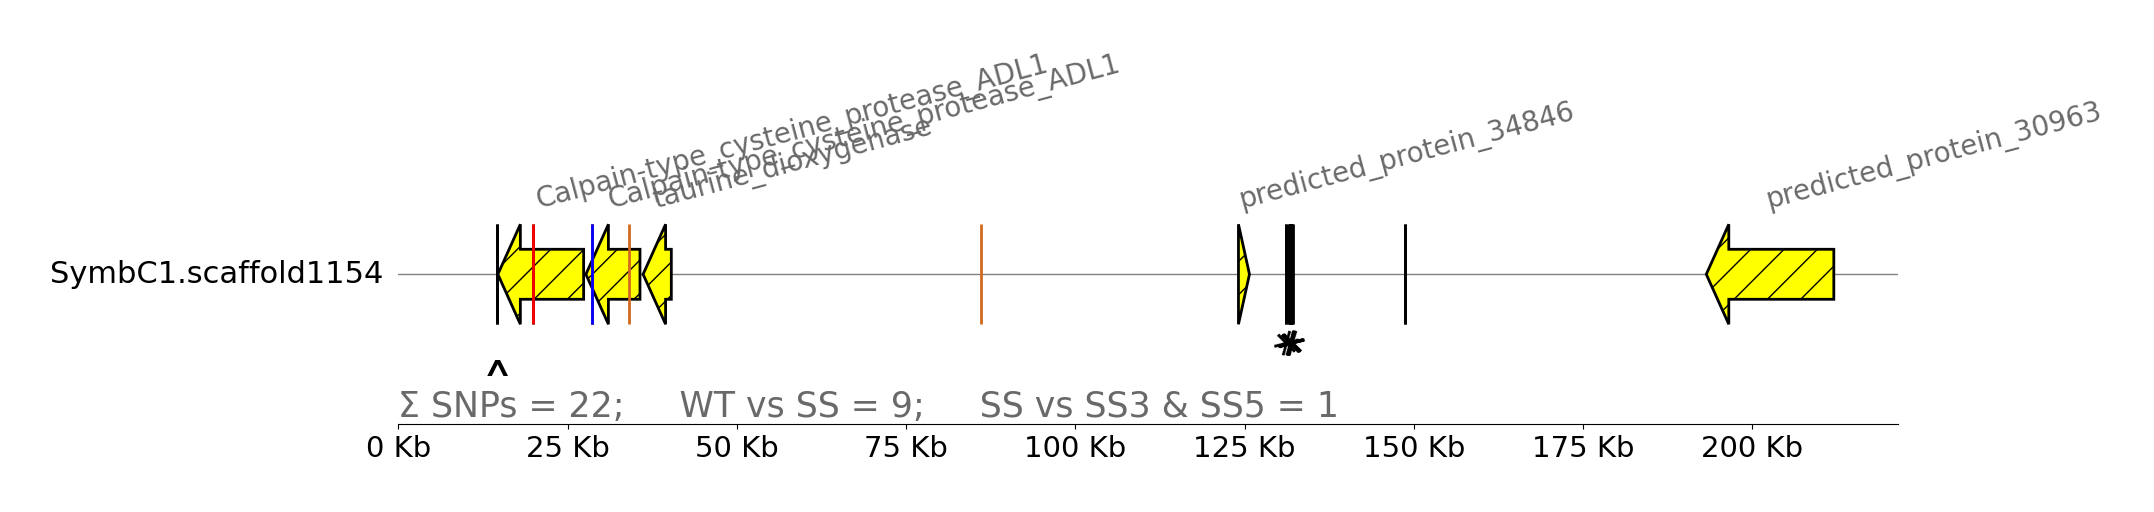

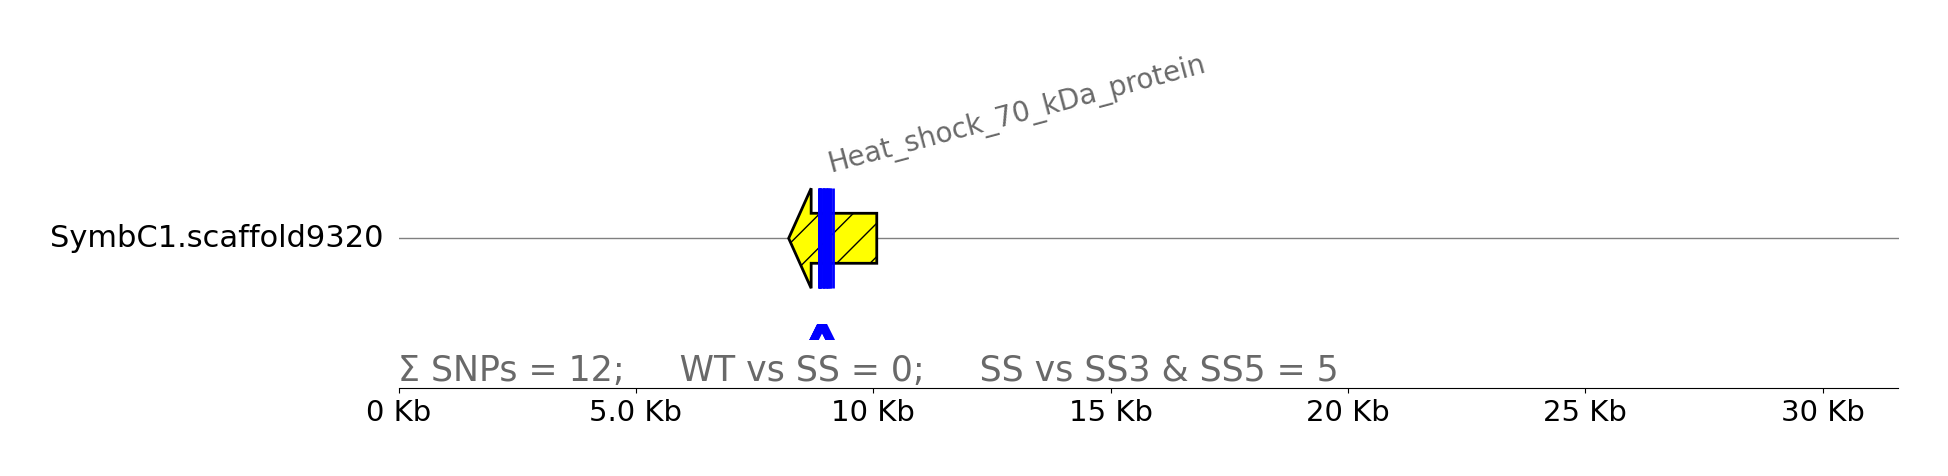

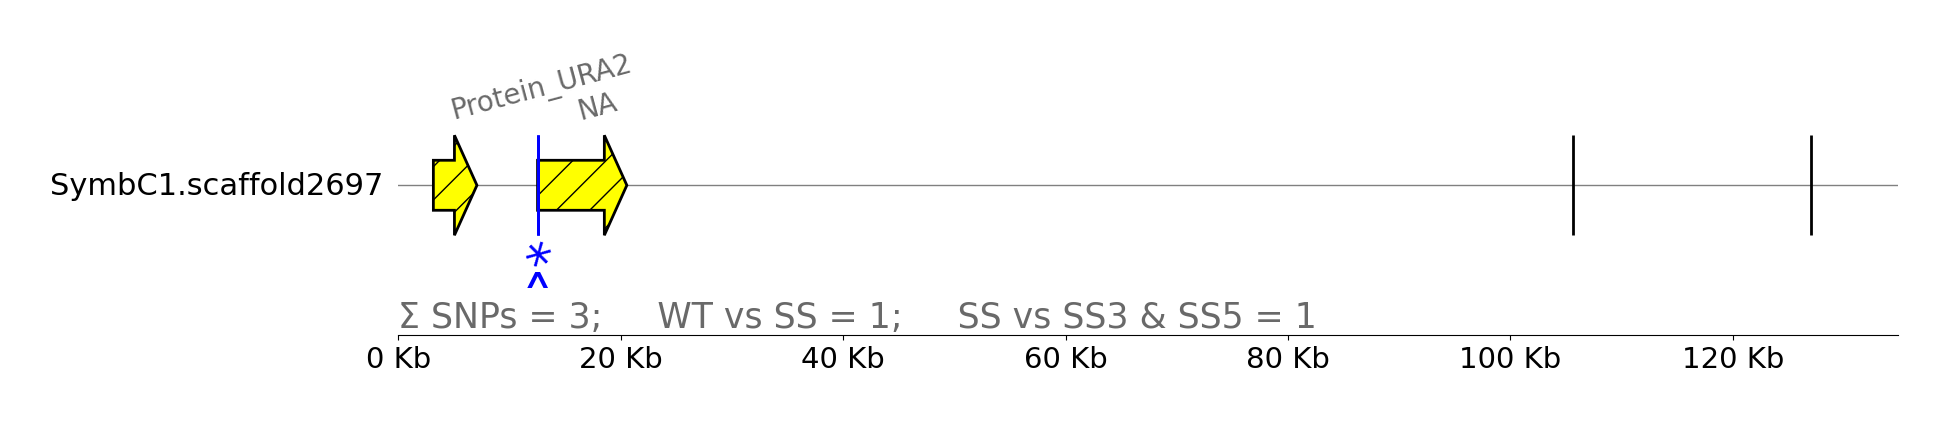

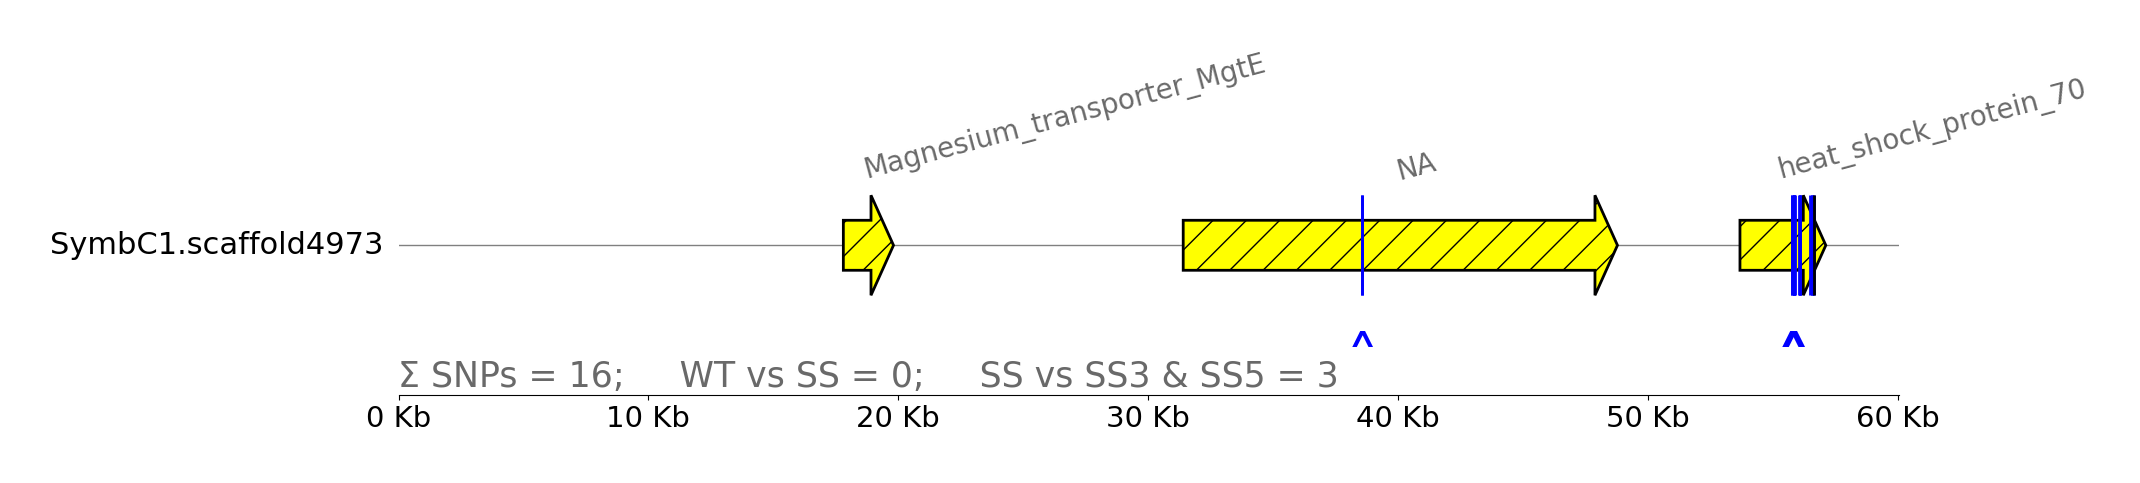

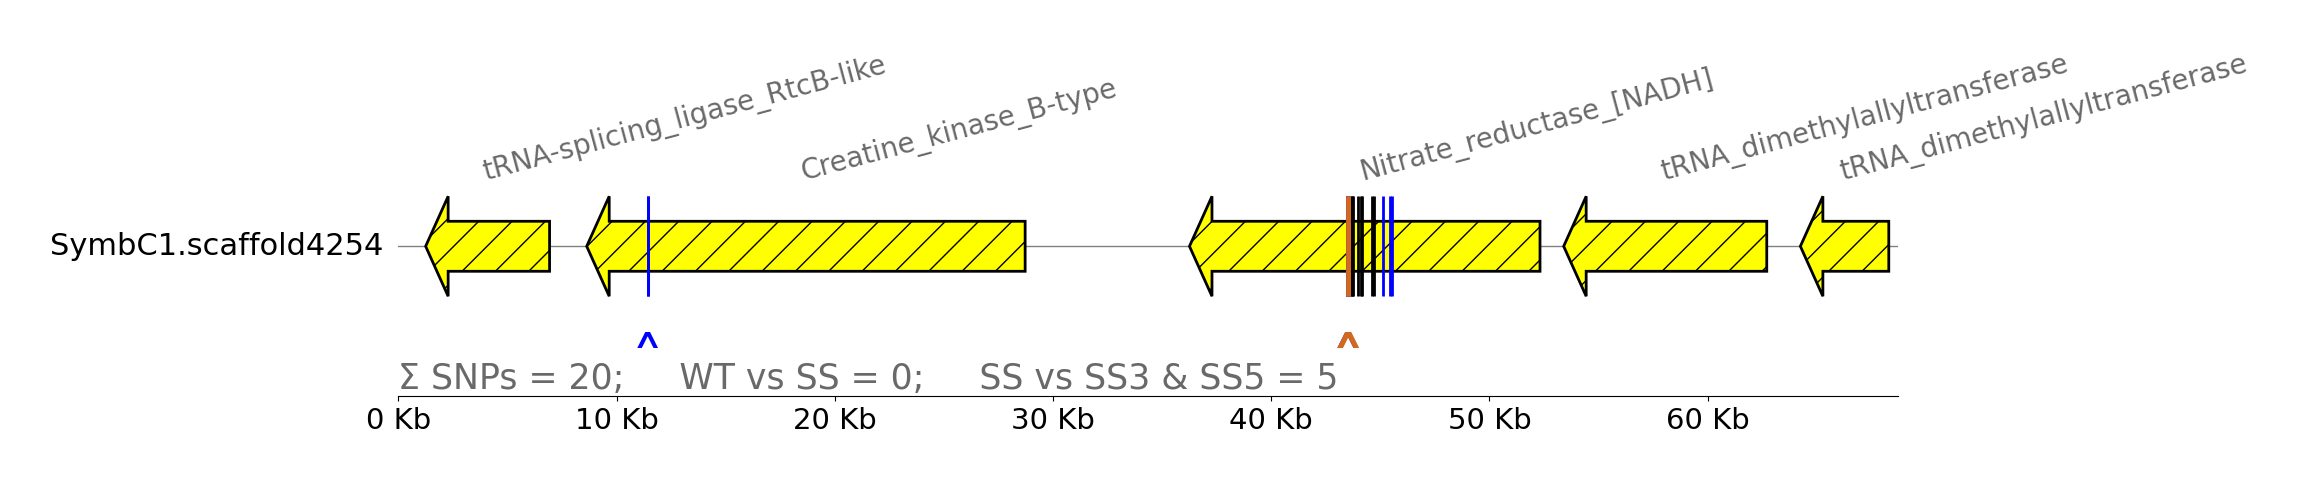

In [9]:
# VISUALISE ONE FULL SCAFFOLD OF INTEREST | OVERVIEW
# VISUALISE ONE FULL SCAFFOLD OF INTEREST | OVERVIEW
# VISUALISE ONE FULL SCAFFOLD OF INTEREST | OVERVIEW
from pygenomeviz import GenomeViz
from pygenomeviz.parser import Gff
from pygenomeviz.utils import load_example_gff_file, is_pseudo_feature
import matplotlib.image as mpimg
import matplotlib.pyplot as plt

# Iterate over each scaffold
for scaffold in scaffolds:
    # Update variables
    scaffold_folder = os.path.join(output_dir, scaffold)
    gff_subset_concatenated_with_SNPs = os.path.join(scaffold_folder, f"{scaffold}_concatenated_output.gff")  
    
    # Load and process your GFF file
    gff = Gff(gff_subset_concatenated_with_SNPs)
    
    # Extract scaffold length from metadata
    scaffold_lengths = {}
    with open(gff_subset_concatenated_with_SNPs, 'r') as file:
        for line in file:
            if not line.startswith('#'):  # Ensure this is not a comment line
                fields = line.strip().split('\t')
                if len(fields) > 8:  # Ensure there is an attributes column
                    attributes = fields[8].split(';')
                    scaffold_length = None
                    for attribute in attributes:
                        if attribute.startswith('Scaffold_Length='):
                            scaffold_length = int(attribute.split('=')[1])
                            break
                    if scaffold_length:
                        seqid = fields[0]
                        scaffold_lengths[seqid] = scaffold_length
    

    ### START BUILDING THE IMAGE.png
    gv = GenomeViz(fig_track_height=1, feature_track_ratio=1)
    
    # Plot SNPs with impact (different colours) and genes features for each contig
    # Plot SNPs with impact (different colours) and genes features for each contig
    for seqid, size in gff.get_seqid2size().items():
        scaffold_length = scaffold_lengths.get(seqid, size)
        track = gv.add_feature_track(seqid, segments=(0, scaffold_length), labelsize=22)
        
        # Add sublabel with total SNP count
        SNP_features = gff.get_seqid2features(feature_type="SNP")[seqid]
        total_snp_count = len(SNP_features)
        #track.add_sublabel(size=18, color="grey", pos = "bottom-left", ymargin = 0.7)
        
        # Add sublabel with total SNP count
        #track.add_sublabel(text=f"SNPs on {scaffold}", size=20, color="black", pos = "top-left", ymargin = 2)
        #track.add_sublabel(text=f"Total #SNPs on scaffold: {snp_count}", pos = "bottom-left", size=18, color="grey", ymargin = 1.3)  # Adjust offset as needed
        # SNPs: in different colour depending on IMPACT CATEGORY
        for feature in SNP_features:
            category = str(feature.qualifiers.get("category", [""])[0])
            if category == "HIGH":
                color = "red"
            elif category == "MODERATE":
                color = "chocolate"
            elif category == "LOW":
                color = "blue"
            else:
                color = "black"
            track.add_features([feature], color=color, plotstyle="bigbox", lw=2)

        # Count significant SNPs for WT vs SS and SS8 vs SS35
        snp_count_below_0_01_WT_vs_SS = sum(
            1 for feature in SNP_features
            if float(feature.qualifiers.get("padjust_WT_vs_SS", [1])[0]) < 0.01
        )
        
        snp_count_below_0_01_SS8_vs_SS35 = sum(
            1 for feature in SNP_features
            if float(feature.qualifiers.get("padjust_SS8_vs_SS35", [1])[0]) < 0.01
        )

        # Add * for significant SNPs for WT vs SS
        for feature in SNP_features:
            padjust_WT_vs_SS = float(feature.qualifiers.get("padjust_WT_vs_SS", [1])[0])
            if padjust_WT_vs_SS < 0.01:
                category = str(feature.qualifiers.get("category", [""])[0])
                if category == "HIGH":
                    color = "red"
                elif category == "MODERATE":
                    color = "chocolate"
                elif category == "LOW":
                    color = "blue"
                else:
                    color = "black"
                track.add_features([feature], color=color, plotstyle="bigbox", label_type="star_WT_vs_SS", fc="skyblue", lw=2, text_kws=dict(size=38, vpos="bottom", hpos="right", color=color, ymargin=-0.05))
        
        # Add * for significant SNPs for SS8 vs SS3 or SS5
        for feature in SNP_features:
            padjust_SS8_vs_SS35 = float(feature.qualifiers.get("padjust_SS8_vs_SS35", [1])[0])
            if padjust_SS8_vs_SS35 < 0.01:
                category = str(feature.qualifiers.get("category", [""])[0])
                if category == "HIGH":
                    color = "red"
                elif category == "MODERATE":
                    color = "chocolate"
                elif category == "LOW":
                    color = "blue"
                else:
                    color = "black"
                track.add_features([feature], color=color, plotstyle="bigbox", label_type="star_SS8_vs_SS35", fc="skyblue", lw=2, text_kws=dict(size=48, rotation=360, vpos="bottom", hpos="center", color=color, ymargin=0.75))

        # Add sublabels for significant SNP counts     
        track.add_sublabel(text=f"Σ SNPs = {total_snp_count};     WT vs SS = {snp_count_below_0_01_WT_vs_SS};     SS vs SS3 & SS5 = {snp_count_below_0_01_SS8_vs_SS35}", pos="bottom-left", size=25, color="dimgrey", ymargin=1.3)
           
        # Add features for genes
        gene_features = gff.get_seqid2features(feature_type="gene")[seqid]
        for feature in gene_features:
            track.add_features([feature], plotstyle="bigarrow", fc="yellow", lw=2, hatch="/", label_type="annotation", text_kws=dict(size=20, vpos="top", rotation=15, color="dimgrey"))
            
    # Adjust scale and save plot to file
    gv.set_scale_xticks(labelsize=21, ymargin=1)
    fig = gv.plotfig()
    
    # Manually adjust space between tracks by altering the position of axes
    axes = fig.get_axes()
    space = -13.5
    for i in range(1, len(axes)):
        pos = axes[i].get_position()
        new_pos = [pos.x0, pos.y0 - (i * space), pos.width, pos.height]
        axes[i].set_position(new_pos)
    
    # Show and save the plot
    plt.show()  # Show the plot in the notebook (optional)
    gv.savefig(os.path.join(scaffold_folder, f"SNPs_{scaffold}_full_sequence.png"), dpi=200)

In [10]:
import os
import shutil
import glob

# Define the output directory
output_dir = "./OUTPUT"

# Create the output directory if it does not exist
if not os.path.exists(output_dir):
    os.makedirs(output_dir)

# Loop through each scaffold folder
for scaffold in scaffolds:
    scaffold_folder = os.path.join(output_dir, scaffold)
    
    # Find all .png files in the scaffold folder
    png_files = glob.glob(os.path.join(scaffold_folder, "*.png"))
    
    # Copy each .png file to the main OUTPUT directory
    for png_file in png_files:
        shutil.copy(png_file, output_dir)
        print(f"Copied {png_file} to {output_dir}")

print("All .png files have been copied to the main OUTPUT folder.")


#### PRINT RUN TIME
# End time
end_time = time.time()

# Calculate and print runtime
runtime = end_time - start_time
# Calculate and print runtime in minutes
runtime_minutes = runtime / 60
print(f"Total runtime of the script: {runtime_minutes:.2f} minutes")

## Clear Memory and reset run for the next
#reset -f

Copied ./OUTPUT/SymbC1.scaffold3829/SNPs_SymbC1.scaffold3829_full_sequence.png to ./OUTPUT
Copied ./OUTPUT/SymbC1.scaffold6722/SNPs_SymbC1.scaffold6722_full_sequence.png to ./OUTPUT
Copied ./OUTPUT/SymbC1.scaffold14903/SNPs_SymbC1.scaffold14903_full_sequence.png to ./OUTPUT
Copied ./OUTPUT/SymbC1.scaffold1282/SNPs_SymbC1.scaffold1282_full_sequence.png to ./OUTPUT
Copied ./OUTPUT/SymbC1.scaffold3428/SNPs_SymbC1.scaffold3428_full_sequence.png to ./OUTPUT
Copied ./OUTPUT/SymbC1.scaffold13115/SNPs_SymbC1.scaffold13115_full_sequence.png to ./OUTPUT
Copied ./OUTPUT/SymbC1.scaffold2613/SNPs_SymbC1.scaffold2613_full_sequence.png to ./OUTPUT
Copied ./OUTPUT/SymbC1.scaffold1154/SNPs_SymbC1.scaffold1154_full_sequence.png to ./OUTPUT
Copied ./OUTPUT/SymbC1.scaffold9320/SNPs_SymbC1.scaffold9320_full_sequence.png to ./OUTPUT
Copied ./OUTPUT/SymbC1.scaffold2697/SNPs_SymbC1.scaffold2697_full_sequence.png to ./OUTPUT
Copied ./OUTPUT/SymbC1.scaffold4973/SNPs_SymbC1.scaffold4973_full_sequence.png to ./OU

In [22]:

from PIL import Image
import os
from datetime import datetime

def prepare_image(image_path, target_size):
    # Open the image
    image = Image.open(image_path)
    original_width, original_height = image.size
    
    # Create a new image with a white background
    target_width, target_height = target_size
    new_image = Image.new('RGB', target_size, (255, 255, 255))
    
    # Paste the original image on the new image, bottom-left aligned
    new_image.paste(image, (0, target_height - original_height))
    
    return new_image

def concatenate_images(image_dir, output_path, target_size, column_padding, row_padding, separator_color=(211, 211, 211), separator_width=10):
    # List all PNG files in the directory
    image_files = [f for f in os.listdir(image_dir) if f.endswith('.png')]
    
    # Ensure there are enough images for 6 rows and 2 columns
    if len(image_files) < 12:
        raise ValueError("Not enough images to form a grid of 6 rows and 2 columns")
    
    # Sort the image files to maintain a specific order
    image_files.sort()
    
    # Define the target size
    target_width, target_height = target_size
    
    # Calculate total height including row padding
    total_height = (target_height * 6) + (row_padding * 5)
    total_width = target_width * 2 + column_padding + separator_width
    
    # Create a new blank image with the required dimensions, including padding and separator
    concatenated_image = Image.new('RGB', (total_width, total_height), (255, 255, 255))
    
    # Draw the separator line
    separator_x = target_width + (column_padding // 2) - (separator_width // 2)
    for y in range(total_height):
        for x in range(separator_width):
            concatenated_image.putpixel((separator_x + x, y), separator_color)
    
    # Prepare and paste images into the new image
    for i, image_file in enumerate(image_files[:12]):  # Use only the first 12 images
        image_path = os.path.join(image_dir, image_file)
        prepared_image = prepare_image(image_path, target_size)
        if i < 6:  # First column
            x_offset = 0
            y_offset = i * (target_height + row_padding)
        else:  # Second column
            x_offset = target_width + column_padding + separator_width
            y_offset = (i - 6) * (target_height + row_padding)
        concatenated_image.paste(prepared_image, (x_offset, y_offset))
    
    # Save the concatenated image
    concatenated_image.save(output_path)

# Example usage
end_time = datetime.now().strftime("%Y%m%d_%H%M%S")  # Current time in YYYYMMDD_HHMMSS format
scaffolds_input_file_name = os.path.splitext(scaffolds_input_file)[0]
image_directory = output_dir
output_image_path = os.path.join(output_dir, f"{scaffolds_input_file_name}_{end_time}.png")
target_resolution = (4000, 900)  # Width, Height
column_padding = 130  # Space between the two columns in pixels
row_padding = 20  # Space between the rows in pixels
concatenate_images(image_directory, output_image_path, target_resolution, column_padding, row_padding)
